Assignment:

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21' 
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

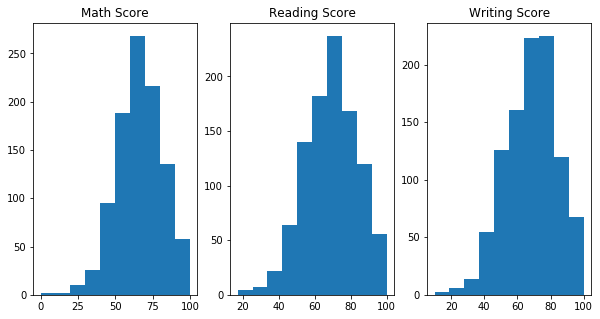

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(df['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
plt.hist(df['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
plt.hist(df['writing score'])
plt.title('Writing Score')

plt.subplots_adjust(hspace = 0.9)
plt.show()

As you can see here, these plots are not normal and we can verify the distributions of the variables don't follow the normal distribution by using the Jarque-Bera and Normal tests.

In [5]:
math_jb = stats.jarque_bera(df["math score"])
math_nor = stats.normaltest(df["math score"])
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(math_jb[0], math_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(math_nor[0], math_nor[1]))

read_jb = stats.jarque_bera(df["reading score"])
read_nor = stats.normaltest(df["reading score"])
print('\nJarque-Bera test statistics is {0} and p value is {1}'.format(read_jb[0], read_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(read_nor[0], read_nor[1]))

write_jb = stats.jarque_bera(df["writing score"])
write_nor = stats.normaltest(df["writing score"])
print('\nJarque-Bera test statistics is {0} and p value is {1}'.format(write_jb[0], write_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(write_nor[0], write_nor[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normal test statistics is 15.408960513931822 and p value is 0.00045080293869937836

Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normal test statistics is 11.11741279628622 and p value is 0.003853758403576582

Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normal test statistics is 13.606450837263859 and p value is 0.0011101885439899974


As you can see, all pvalue in both tests are less than 0.05 which means that score exams distribution don't follow normal distribution and statistically different from the normal distribution.

In [6]:
# there is a math score equals to 0, since boxcox transformation only works with positive data,so we are excluding it.
math_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

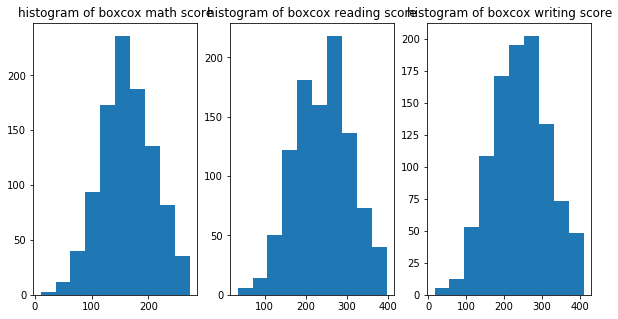

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of boxcox math score")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of boxcox reading score")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of boxcox writing score")

plt.show()

In [8]:
boxcoxmath_jb = jarque_bera(math_boxcox)
boxcoxmath_nor = normaltest(math_boxcox)
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(boxcoxmath_jb[0], boxcoxmath_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(boxcoxmath_nor[0], boxcoxmath_nor[1]))

boxcoxread_jb = jarque_bera(reading_boxcox)
boxcoxread_nor = normaltest(reading_boxcox)
print('\nJarque-Bera test statistics is {0} and p value is {1}'.format(boxcoxread_jb[0], boxcoxread_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(boxcoxread_nor[0], boxcoxread_nor[1]))

boxcoxwrite_jb = jarque_bera(writing_boxcox)
boxcoxwrite_nor = normaltest(writing_boxcox)
print('\nJarque-Bera test statistics is {0} and p value is {1}'.format(boxcoxwrite_jb[0], boxcoxwrite_jb[1]))
print('Normal test statistics is {0} and p value is {1}'.format(boxcoxwrite_nor[0], boxcoxwrite_nor[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normal test statistics is 1.8323073377495822 and p value is 0.40005482895717037

Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normal test statistics is 5.282274611852865 and p value is 0.07128015609575467

Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normal test statistics is 6.267311355043339 and p value is 0.04355827085023795


As you can see after applying boxcox the distribution more close to normal distribution, also Jarque_bera and normal test show that.

2.Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [9]:
exam_score = (df['math score'] + df['reading score'] + df['writing score'])/3

Text(0.5, 1.0, 'histogram of exam score')

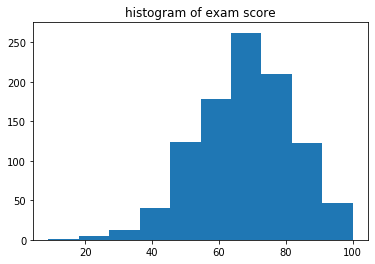

In [10]:
plt.hist(exam_score)
plt.title("histogram of exam score")

as you can see, the distribution is not normal. use jarque_ bera and normal test to confirm that.

In [11]:
exam_jb = jarque_bera(exam_score)
exam_nor = normaltest(exam_score)
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(exam_jb[0], exam_jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(exam_nor[0], exam_nor[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
normal test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [12]:
exam_boxcox,_ = boxcox(exam_score)

Text(0.5, 1.0, 'histogram of boxcox exam score')

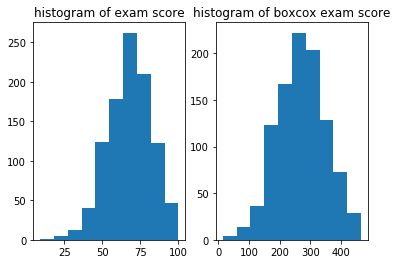

In [13]:
plt.subplot(1,2,1)
plt.hist(exam_score)
plt.title("histogram of exam score")

plt.subplot(1,2,2)
plt.hist(exam_boxcox)
plt.title('histogram of boxcox exam score')

In [14]:
boxcoxexam_jb = jarque_bera(exam_boxcox)
boxcoxexam_nor = normaltest(exam_boxcox)
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(boxcoxexam_jb[0], boxcoxexam_jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(boxcoxexam_nor[0], boxcoxexam_nor[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
normal test statistics is 2.779857245981238 and p value is 0.2490930835165177


As you see here, after applying boxcox, the distribution more close to normal.

3.Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

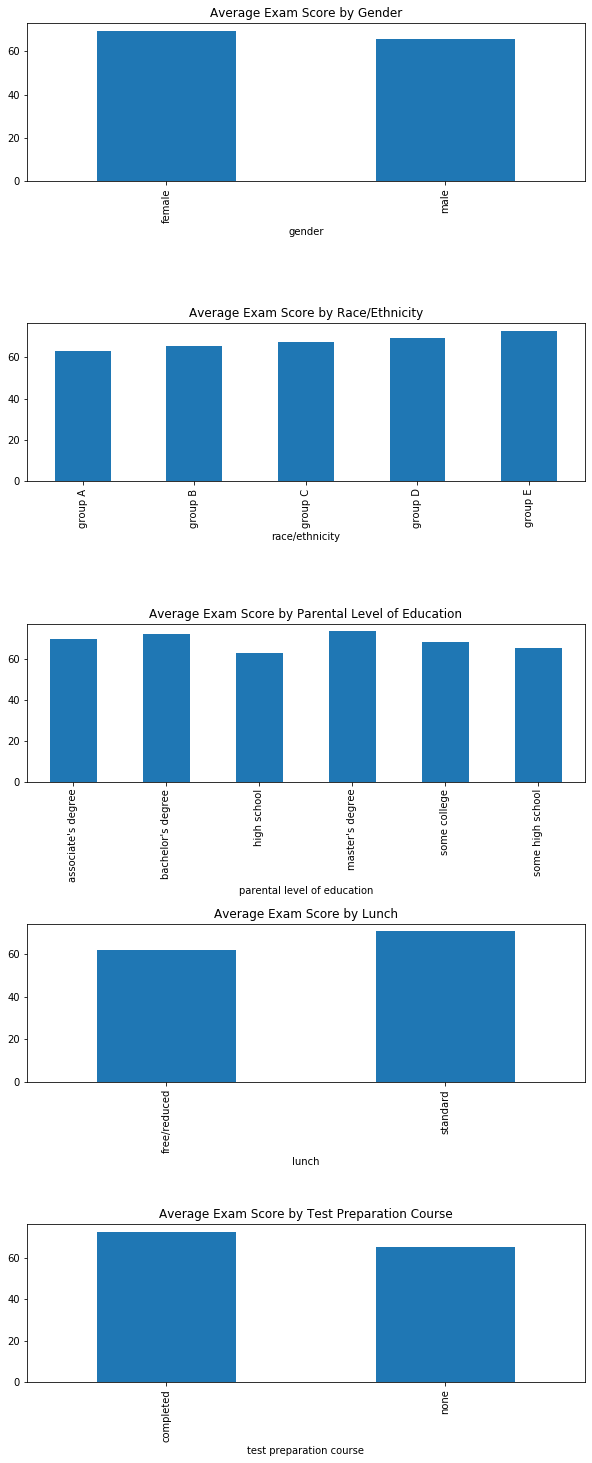

In [23]:
df['exam_score']=exam_score
plt.figure(figsize=(10,25))

plt.subplot(5,1,1)
df.groupby('gender').exam_score.mean().plot(kind='bar')
plt.title('Average Exam Score by Gender')

plt.subplot(5,1,2)
df.groupby('race/ethnicity').exam_score.mean().plot(kind='bar')
plt.title('Average Exam Score by Race/Ethnicity')

plt.subplot(5,1,3)
df.groupby('parental level of education').exam_score.mean().plot(kind='bar')
plt.title('Average Exam Score by Parental Level of Education')

plt.subplot(5,1,4)
df.groupby('lunch').exam_score.mean().plot(kind='bar')
plt.title('Average Exam Score by Lunch')

plt.subplot(5,1,5)
df.groupby('test preparation course').exam_score.mean().plot(kind='bar')
plt.title('Average Exam Score by Test Preparation Course')

plt.subplots_adjust(hspace=0.9)
plt.show()

As you can see, all variables can affect to success of exam.

In gender, female are more succefull than male.

In race/ethnicity, exam score increas from group A to E.

In Parental level of education, as you can see here  exam score increases for students  who have parents with bachelor or master degree's education.

In lunch, exam score increase for standard type lunch.

Also, for Test Preparation course for students who completed  the course are more successful. 